/tmp/ipykernel_21449/2932344435.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_21449/2932344435.py:50: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


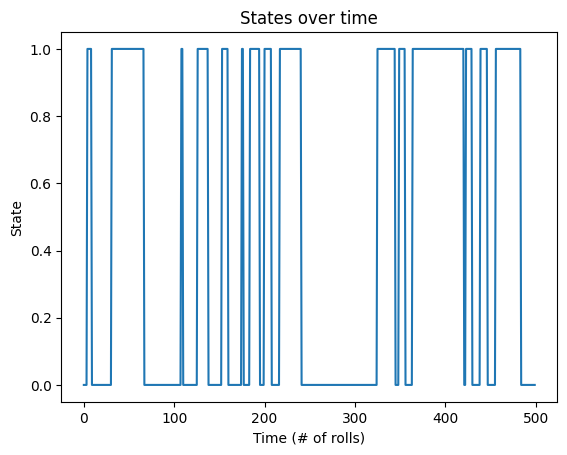

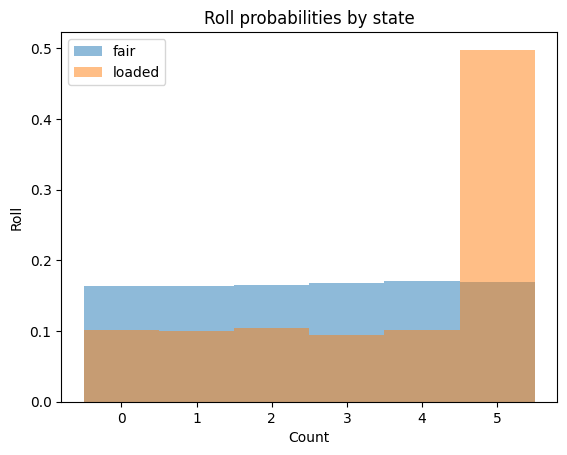

In [81]:
import numpy as np
import matplotlib.pyplot as plt

from hmmlearn import hmm

# make our generative model with two components, a fair die and a
# loaded die
gen_model = hmm.CategoricalHMM(n_components=2, random_state=99)

# the first state is the fair die so let's start there so no one
# catches on right away
gen_model.startprob_ = np.array([1.0, 0.0])

# now let's say that we sneak the loaded die in:
# here, we have a 95% chance to continue using the fair die and a 5%
# chance to switch to the loaded die
# when we enter the loaded die state, we have a 90% chance of staying
# in that state and a 10% chance of leaving
gen_model.transmat_ = np.array([[0.95, 0.05],
                                [0.1, 0.9]])

# now let's set the emission means:
# the first state is a fair die with equal probabilities and the
# second is loaded by being biased toward rolling a six
gen_model.emissionprob_ = \
    np.array([[1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6],
              [1 / 10, 1 / 10, 1 / 10, 1 / 10, 1 / 10, 1 / 2]])

# simulate the loaded dice rolls
rolls, gen_states = gen_model.sample(30000)

# plot states over time, let's just look at the first rolls for clarity
fig, ax = plt.subplots()
ax.plot(gen_states[:500])
ax.set_title('States over time')
ax.set_xlabel('Time (# of rolls)')
ax.set_ylabel('State')
fig.show()

# plot rolls for the fair and loaded states
fig, ax = plt.subplots()
ax.hist(rolls[gen_states == 0], label='fair', alpha=0.5,
        bins=np.arange(7) - 0.5, density=True)
ax.hist(rolls[gen_states == 1], label='loaded', alpha=0.5,
        bins=np.arange(7) - 0.5, density=True)
ax.set_title('Roll probabilities by state')
ax.set_xlabel('Count')
ax.set_ylabel('Roll')
ax.legend()
fig.show()


Model #0	Score: -26391.366333754417
Model #1	Score: -26395.55036935765
Model #2	Score: -26405.242643523045
Model #3	Score: -26396.290283735074
Model #4	Score: -26395.550365729432
Model #5	Score: -26375.751287788156
Model #6	Score: -26395.484471121286
Model #7	Score: -26300.67439814334
Model #8	Score: -26265.231791849812
Model #9	Score: -26395.55035772545
Model #10	Score: -26317.463400795954
Model #11	Score: -26405.406087293268
Model #12	Score: -26254.557676396787
Model #13	Score: -26395.48203896293
Model #14	Score: -26247.853013145424
Model #15	Score: -26280.573611469306
Model #16	Score: -26236.969346747417
Model #17	Score: -26320.854926120493
Model #18	Score: -26273.892419655065
Model #19	Score: -26404.09350827867
Model #20	Score: -26405.639243735335
Model #21	Score: -26385.763376940475
Model #22	Score: -26395.4853914974
Model #23	Score: -26395.550366095962
Model #24	Score: -26308.427880823318
Model #25	Score: -26395.506893588612
Model #26	Score: -26296.28241513246
Model #27	Score: -2

/tmp/ipykernel_21449/2821640244.py:45: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


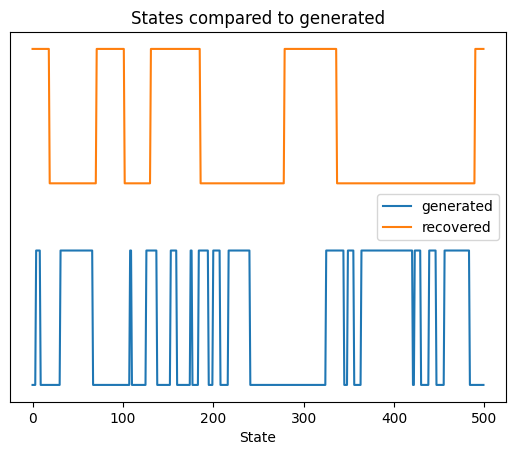

In [82]:
# split our data into training and validation sets (50/50 split)
X_train = rolls[:rolls.shape[0] // 2]
X_validate = rolls[rolls.shape[0] // 2:]

# check optimal score
gen_score = gen_model.score(X_validate)

best_score = best_model = None
n_fits = 50
np.random.seed(13)
for idx in range(n_fits):
    model = hmm.CategoricalHMM(
        n_components=2, random_state=idx,
        init_params='se')  # don't init transition, set it below
    # we need to initialize with random transition matrix probabilities
    # because the default is an even likelihood transition
    # we know transitions are rare (otherwise the casino would get caught!)
    # so let's have an Dirichlet random prior with an alpha value of
    # (0.1, 0.9) to enforce our assumption transitions happen roughly 10%
    # of the time
    model.transmat_ = np.array([np.random.dirichlet([0.9, 0.1]),
                                np.random.dirichlet([0.1, 0.9])])
    model.fit(X_train)
    score = model.score(X_validate)
    print(f'Model #{idx}\tScore: {score}')
    if best_score is None or score > best_score:
        best_model = model
        best_score = score

print(f'Generated score: {gen_score}\nBest score:      {best_score}')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
states = best_model.predict(rolls)

# plot our recovered states compared to generated (aim 1)
fig, ax = plt.subplots()
ax.plot(gen_states[:500], label='generated')
ax.plot(states[:500] + 1.5, label='recovered')
ax.set_yticks([])
ax.set_title('States compared to generated')
ax.set_xlabel('Time (# rolls)')
ax.set_xlabel('State')
ax.legend()
fig.show()

In [83]:
print(f'Transmission Matrix Generated:\n{gen_model.transmat_.round(3)}\n\n'
      f'Transmission Matrix Recovered:\n{best_model.transmat_.round(3)}\n\n')

Transmission Matrix Generated:
[[0.95 0.05]
 [0.1  0.9 ]]

Transmission Matrix Recovered:
[[0.922 0.078]
 [0.059 0.941]]




In [84]:
print(f'Emission Matrix Generated:\n{gen_model.emissionprob_.round(3)}\n\n'
      f'Emission Matrix Recovered:\n{best_model.emissionprob_.round(3)}\n\n')

Emission Matrix Generated:
[[0.167 0.167 0.167 0.167 0.167 0.167]
 [0.1   0.1   0.1   0.1   0.1   0.5  ]]

Emission Matrix Recovered:
[[0.106 0.108 0.114 0.105 0.113 0.454]
 [0.168 0.168 0.167 0.171 0.172 0.153]]




In [36]:
Z

array([1, 1, 0, 0, 0, 0, 0, 0, 3, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 3, 2,
       1, 2, 2, 3, 0, 1, 2, 2, 2, 3, 3, 2, 1, 2, 2, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 3, 3, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 3, 2, 2, 2, 1, 0, 0, 0, 0, 3, 3, 3, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 0,
       0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2,
       2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 2, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 3, 3, 3, 2, 2, 3, 0, 0,
       0, 0, 3, 2, 3, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 3, 3, 2,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 2, 2, 2, 1, 0, 0,

In [37]:
model.transmat_

array([[5.07692308e-001, 2.92307692e-001, 2.00000000e-001,
        1.28209228e-110],
       [1.68316832e-001, 7.52475248e-001, 1.56370272e-155,
        7.92079208e-002],
       [3.68421053e-001, 1.33137342e-166, 3.68421053e-001,
        2.63157895e-001],
       [3.57695279e-088, 1.33333333e-001, 2.66666667e-001,
        6.00000000e-001]])